# Chronos-T5 Small
[Link del modelo](https://huggingface.co/amazon/chronos-t5-small#chronos-t5-small)

In [1]:
pip install git+https://github.com/amazon-science/chronos-forecasting.git


  Cloning https://github.com/amazon-science/chronos-forecasting.git to c:\users\equipo\appdata\local\temp\pip-req-build-d2nufq39
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 6a9c8dadac04eb85befc935043e3e2cce914267f
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for chronos-forecasting: filename=chronos_forecasting-1.5.2-py3-none-any.whl size=29539 sha256=b8c4a8dd38269d7b3080a5167bad70bc35fa1324b1a3f54fdb6d4b57f0e33076
  Stored in directory: C:\Users\equipo\AppData\Local\Temp\pip-ephem-wheel-cache-yqv65yai\wheels\ba\7f\47\c8e535215a6b02669af6db36392beef76752951c59bf8b5e74
Successfully built chronos-forecasting
Note: you may need to restart the kernel to use up

  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git 'C:\Users\equipo\AppData\Local\Temp\pip-req-build-d2nufq39'

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


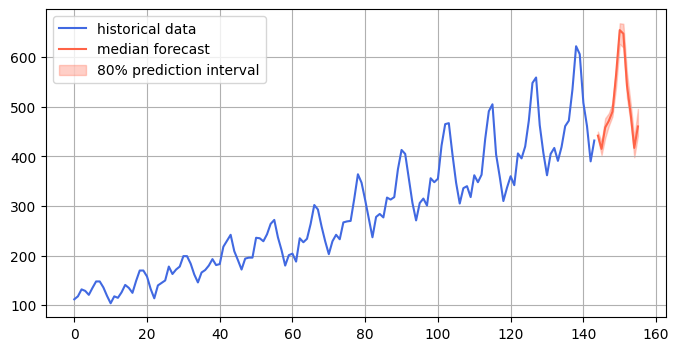

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-small",
  device_map="cpu",
  torch_dtype=torch.bfloat16,
)

df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["#Passengers"])
prediction_length = 12
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()


In [11]:
pip install --upgrade yfinance


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.55
    Uninstalling yfinance-0.2.55:
      Successfully uninstalled yfinance-0.2.55
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Ejemplo con la prediccion del Dolar

In [ ]:
import yfinance as yf

# Descargar el valor histórico del USD a COP desde el 1 de enero de 2024 hasta el 1 de mayo de 2025
dolar = yf.download("USDCOP=X", start="2025-01-01", end="2025-05-01", interval="1d")
# Mostrar los primeros registros
print(dolar.head())


Status Code: 200
Response JSON:
{
  "success": false,
  "error": {
    "code": 101,
    "type": "missing_access_key",
    "info": "You have not supplied an API Access Key. [Required format: access_key=YOUR_ACCESS_KEY]"
  }
}


## Citacion

@article{ansari2024chronos,
    title={Chronos: Learning the Language of Time Series},
    author={Ansari, Abdul Fatir and Stella, Lorenzo and Turkmen, Caner and Zhang, Xiyuan, and Mercado, Pedro and Shen, Huibin and Shchur, Oleksandr and Rangapuram, Syama Syndar and Pineda Arango, Sebastian and Kapoor, Shubham and Zschiegner, Jasper and Maddix, Danielle C. and Mahoney, Michael W. and Torkkola, Kari and Gordon Wilson, Andrew and Bohlke-Schneider, Michael and Wang, Yuyang},
    journal={Transactions on Machine Learning Research},
    issn={2835-8856},
    year={2024},
    url={https://openreview.net/forum?id=gerNCVqqtR}
}
